# 一维线性回归nn.Linear

实现`y = 2x`的训练和预测

## 1. 构造模型

In [3]:
from torch import nn
from torch import optim
import torch
from matplotlib import pyplot as plt

class OneLinearModel(nn.Module):
    
    def __init__(self):
        super(OneLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1) # 输入输出一维
        
    def forward(self, x):
        y_pred = self.linear(x) # y_pred为预测的值
        return y_pred

## 2. 损失函数

* `nn.MSELoss` 平方损失函数
*  `y_pred - y` 差

## 3. 梯度更新

* `BGD` 批量梯度下降
* `SGD` 随机梯度下降

## 4. 训练

In [4]:
def train():
    model = OneLinearModel()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    x_data = torch.rand(100, 1) * 10
    y_data = 2 * x_data
    loss_data = []

    for epoch in range(10):
        y_pred = model(x_data)

        loss = criterion(y_pred, y_data)

        loss_data.append(loss.detach().numpy())

        optimizer.zero_grad()  # 清空模型参数的梯度

        loss.backward()  # 反向传播

        optimizer.step()

    plt.plot(loss_data)
    return model

## 5. 验证

tensor([4.8303], grad_fn=<ViewBackward0>)


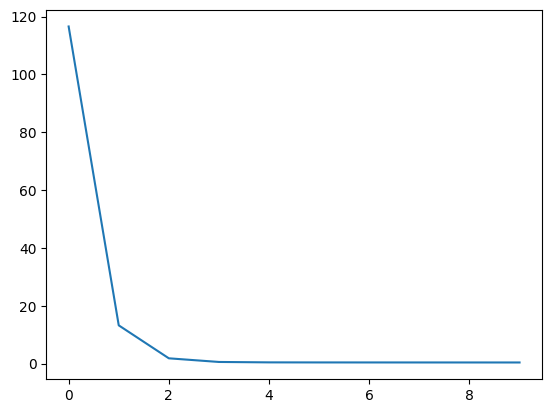

In [5]:
model = train()
model.eval()
y = model(torch.Tensor([2.0]))
print(y)